## Importing libraries!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) Make the Regression!

In [2]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100,n_features=5,noise=20,random_state=101)

# 2) Plot and Analyze data

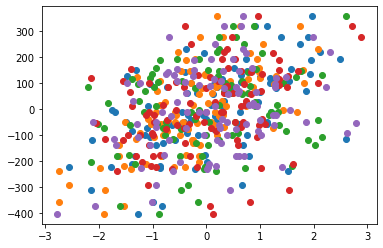

In [12]:
plt.scatter(x[:,0],y) 
plt.scatter(x[:,1],y) 
plt.scatter(x[:,2],y) 
plt.scatter(x[:,3],y) 
plt.scatter(x[:,4],y) 

In [13]:
#print mean, standar deviation, and variance of x
print(np.mean(x))
print(np.std(x))
print(np.var(x))

0.02408500943664587
1.0546520360023408
1.1122909170438826


In [14]:
#training test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# 3)Generate polynomial features (terms) remember the equation 

In [16]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(x_train)

In [27]:
poly.fit(X_poly, y_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_poly_test=poly.fit_transform(x_test)

## RMS

In [28]:
#predicting through polynomial Regression(Linear Regression Model)
y_pred_=model.predict(X_poly_test)

In [29]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred_)
print("RMS Score:")
print(rms)

RMS Score:
63168.16138257676


# 4)Choose estimator (regression model)

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [30]:
#Linear least squares with l2 regularization (use “Ridge”)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(poly.fit_transform(x),y)

Ridge(alpha=1)

In [31]:
# perform train test split  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# 5)Perform cross validation (5-fold)

In [36]:
# cross validation 5 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge,poly.fit_transform(x_train),y_train,cv=5)
print(scores)
print(np.average(scores))

[ 0.59076013  0.70123526  0.90452998  0.84617772 -0.63400881]
0.48173885662922933


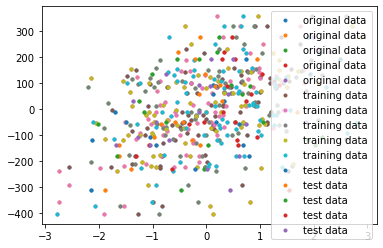

In [33]:
# print all curves in same plot
plt.plot(x,y,'.',label='original data')
plt.plot(x_train,y_train,'.',label='training data')
plt.plot(x_test,y_test,'.',label='test data')
#plt.plot(x,ridge.predict(poly.fit_transform(x)),label='prediction')
plt.legend()
plt.show()


In [35]:
from sklearn.model_selection import KFold,cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
print(np.average(scores) ) 

-19.257485675260927
